In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, r2_score, mean_squared_error, accuracy_score, make_scorer, mean_absolute_error, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import time
import joblib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier


In [2]:
def algorithms(X_train, y_train, X_test, y_test, classifier, scaler=False, plot_confusion_matrix=True, model_filename='model.joblib'):
    
    # Lựa chọn chuẩn hóa hay không
    if scaler:
        steps = [('scaler', StandardScaler()), ('clf', classifier)]
    else:
        steps = [('clf', classifier)]
        
    pipeline = Pipeline(steps)

    # Huấn luyện trên tập train
    pipeline.fit(X_train, y_train)

    # Dự đoán trên tập train và test
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # In kết quả đánh giá
    print("TRAIN Set Classification Report:")
    print(classification_report(y_train, train_pred))
    print("TEST Set Classification Report:")
    print(classification_report(y_test, test_pred))
    print("")
    print("Parameters Used: \n\n", pipeline.get_params())

    # Tính toán và hiển thị Confusion Matrix (không thay đổi)
    if plot_confusion_matrix:
        cm = confusion_matrix(y_test, test_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
        disp.plot()
        plt.show()

    # Lưu mô hình
    joblib.dump(pipeline, model_filename)
    print(f"Saved to: {model_filename}")

In [3]:
iot_data = pd.read_csv('/kaggle/input/traiining-p2/iot23_processed_fix_2.csv')

In [4]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280000 entries, 0 to 2279999
Data columns (total 47 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id.orig_p          float64
 1   id.resp_p          float64
 2   duration           float64
 3   orig_bytes         float64
 4   resp_bytes         float64
 5   missed_bytes       float64
 6   orig_pkts          float64
 7   orig_ip_bytes      float64
 8   resp_pkts          float64
 9   resp_ip_bytes      float64
 10  label              float64
 11  proto_icmp         float64
 12  proto_tcp          float64
 13  proto_udp          float64
 14  service_dhcp       float64
 15  service_dns        float64
 16  service_http       float64
 17  service_ssh        float64
 18  service_ssl        float64
 19  conn_state_OTH     float64
 20  conn_state_REJ     float64
 21  conn_state_RSTO    float64
 22  conn_state_RSTOS0  float64
 23  conn_state_RSTR    float64
 24  conn_state_RSTRH   float64
 25  conn_state_S0     

In [5]:
iot_data['label'].value_counts()

label
3.0    700000
2.0    650000
0.0    550000
1.0    380000
Name: count, dtype: int64

In [6]:
#iot_data.drop(columns = ['label2','ts','starting_point','Unnamed: 0'], inplace = True)

In [7]:
iot_data.head()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,history_S,history_ShADadfF,history_ShADafF,history_ShAFf,history_ShAdDaFf,history_ShAdDaf,history_ShAdDafF,history_ShAdfDr,history_Sr,history_^c
0,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.668238,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.605829,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Chia tập dữ liệu

In [8]:
len(iot_data) * .7, len(iot_data) * .3


(1596000.0, 684000.0)

In [9]:
#from imblearn.under_sampling import NearMiss

# Tách cột train và test
X, y = iot_data.drop(columns=['label']), iot_data.label

# Tạo đối tượng NearMiss
#nm = NearMiss(version=1) # Bạn có thể chọn version=1, 2 hoặc 3

# Thực hiện undersampling
#X_resampled, y_resampled = nm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape


((1596000, 46), (684000, 46))

In [13]:
iot_data.head()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,history_S,history_ShADadfF,history_ShADafF,history_ShAFf,history_ShAdDaFf,history_ShAdDaf,history_ShAdDafF,history_ShAdfDr,history_Sr,history_^c
0,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.668238,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.605829,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Training

In [16]:
'''label_counts = iot_data_df_dup['label'].value_counts()

print(label_counts)'''

"label_counts = iot_data_df_dup['label'].value_counts()\n\nprint(label_counts)"

#### 3.1. KNN

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       0.99      0.92      0.96    489839

    accuracy                           0.97   1596000
   macro avg       0.98      0.98      0.98   1596000
weighted avg       0.98      0.97      0.97   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       0.98      0.89      0.93    210161

    accuracy                           0.96    684000
   macro avg       0.96      0.97      0.96    684000
weighted avg       0.96      0.96      0.96    684000


Parameters Used: 

 {'memory': None, 'steps': [('scaler', Standa

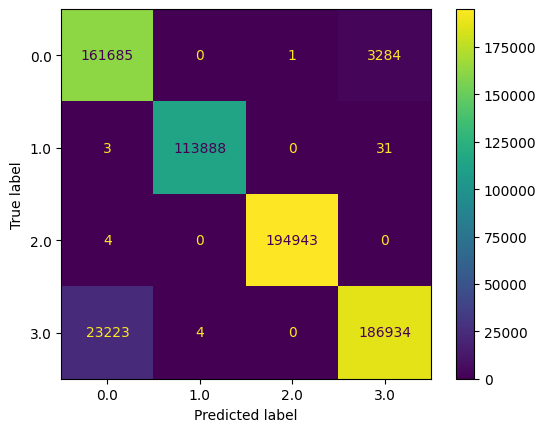

Saved to: knn.joblib
time cost:  10398.216326236725 seconds


In [17]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=KNeighborsClassifier(),
                                    scaler=True,
                                    model_filename='knn.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.2. Des Tree

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       1.00      0.93      0.96    489839

    accuracy                           0.98   1596000
   macro avg       0.98      0.98      0.98   1596000
weighted avg       0.98      0.98      0.98   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       0.97      0.91      0.94    210161

    accuracy                           0.96    684000
   macro avg       0.97      0.97      0.97    684000
weighted avg       0.97      0.96      0.96    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', DecisionT

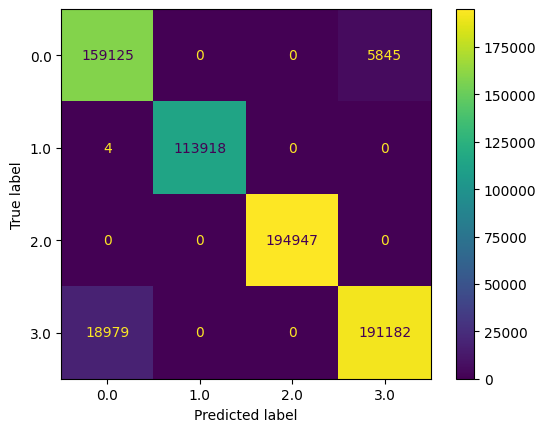

Saved to: des_tree.joblib
time cost:  19.473457098007202 seconds


In [18]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, criterion='gini'),
                                    model_filename='des_tree.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.3. Random Forest

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       1.00      0.91      0.95    489839

    accuracy                           0.97   1596000
   macro avg       0.97      0.98      0.97   1596000
weighted avg       0.98      0.97      0.97   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       1.00      0.90      0.95    210161

    accuracy                           0.97    684000
   macro avg       0.97      0.97      0.97    684000
weighted avg       0.97      0.97      0.97    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', RandomFor

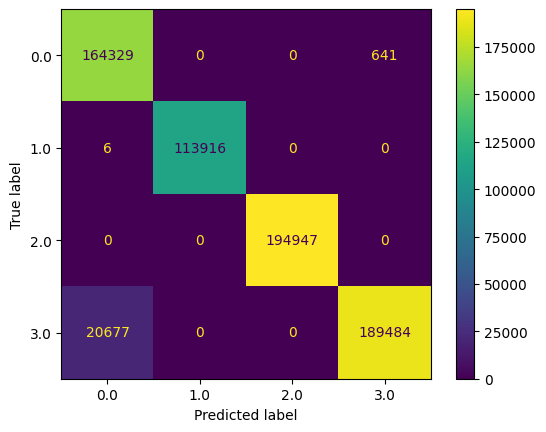

Saved to: random_forest.joblib
time cost:  122.8709168434143 seconds


In [19]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=RandomForestClassifier(n_jobs=-1),
                                    model_filename='random_forest.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.4. SVM

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.36      0.50    385030
         1.0       1.00      1.00      1.00    266078
         2.0       0.87      0.90      0.89    455053
         3.0       0.59      0.83      0.69    489839

    accuracy                           0.77   1596000
   macro avg       0.82      0.77      0.77   1596000
weighted avg       0.79      0.77      0.75   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50    164970
         1.0       1.00      1.00      1.00    113922
         2.0       0.87      0.90      0.89    194947
         3.0       0.59      0.83      0.69    210161

    accuracy                           0.77    684000
   macro avg       0.82      0.77      0.77    684000
weighted avg       0.79      0.77      0.75    684000


Parameters Used: 

 {'memory': None, 'steps': [('scaler', Standa

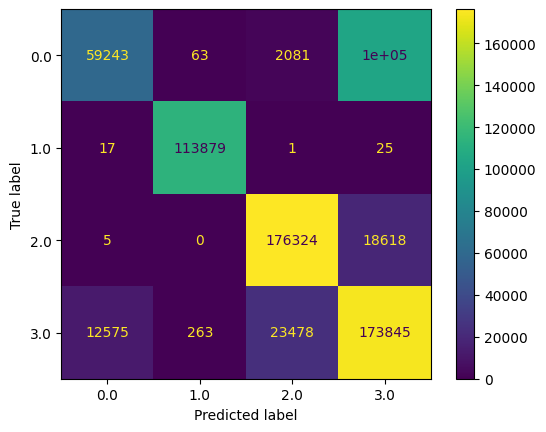

Saved to: svm.joblib
time cost:  6830.766277313232 seconds


In [20]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=LinearSVC(dual=False),
                                    scaler=True,
                                    model_filename='svm.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.5. Naive Bayes

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.27      0.42    385030
         1.0       0.26      1.00      0.41    266078
         2.0       1.00      1.00      1.00    455053
         3.0       0.96      0.00      0.00    489839

    accuracy                           0.52   1596000
   macro avg       0.80      0.57      0.46   1596000
weighted avg       0.86      0.52      0.45   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.27      0.42    164970
         1.0       0.26      1.00      0.41    113922
         2.0       1.00      1.00      1.00    194947
         3.0       0.95      0.00      0.00    210161

    accuracy                           0.52    684000
   macro avg       0.80      0.57      0.46    684000
weighted avg       0.86      0.52      0.45    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', GaussianN

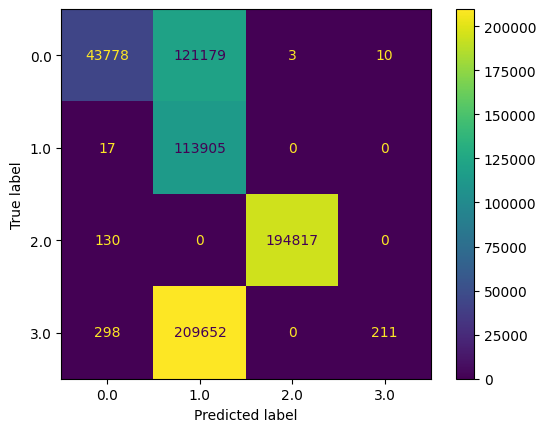

Saved to: naive_bayes.joblib
time cost:  11.647858381271362 seconds


In [21]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, scaler=False, classifier=GaussianNB(), model_filename='naive_bayes.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.6. ANN

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       0.76      0.85      0.80    489839

    accuracy                           0.87   1596000
   macro avg       0.88      0.87      0.88   1596000
weighted avg       0.87      0.87      0.87   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.70    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       0.75      0.85      0.80    210161

    accuracy                           0.87    684000
   macro avg       0.88      0.87      0.88    684000
weighted avg       0.87      0.87      0.87    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', MLPClassi

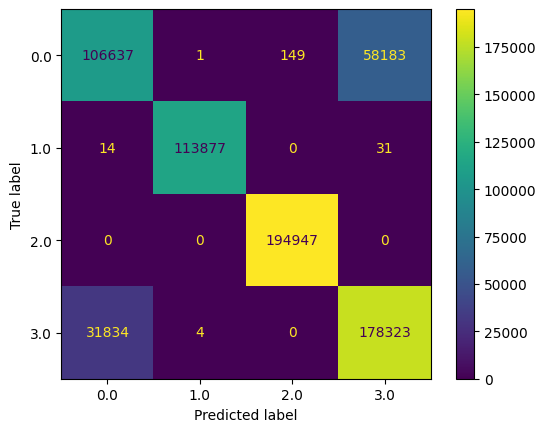

Saved to: ann.joblib
time cost:  1989.315259218216 seconds


In [22]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=MLPClassifier(max_iter=200),
                                    model_filename='ann.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.7. AdaBoost

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       0.80      0.75      0.78    489839

    accuracy                           0.87   1596000
   macro avg       0.88      0.88      0.88   1596000
weighted avg       0.87      0.87      0.87   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       0.80      0.75      0.77    210161

    accuracy                           0.87    684000
   macro avg       0.88      0.88      0.88    684000
weighted avg       0.87      0.87      0.87    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', AdaBoostC

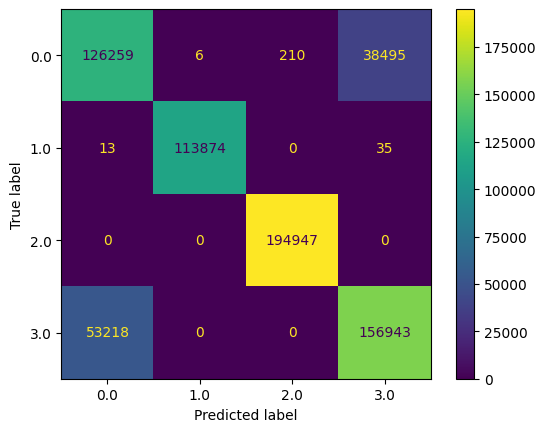

Saved to: ada.joblib
time cost:  120.16968607902527 seconds


In [23]:
start = time.time()
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=AdaBoostClassifier(algorithm='SAMME'),
                                    model_filename='ada.joblib')
end = time.time()
print('time cost: ', end - start, 'seconds')

#### 3.8. XGBoost

TRAIN Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    385030
         1.0       1.00      1.00      1.00    266078
         2.0       1.00      1.00      1.00    455053
         3.0       1.00      0.98      0.99    489839

    accuracy                           0.99   1596000
   macro avg       0.99      0.99      0.99   1596000
weighted avg       0.99      0.99      0.99   1596000

TEST Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    164970
         1.0       1.00      1.00      1.00    113922
         2.0       1.00      1.00      1.00    194947
         3.0       1.00      0.98      0.99    210161

    accuracy                           0.99    684000
   macro avg       0.99      0.99      0.99    684000
weighted avg       0.99      0.99      0.99    684000


Parameters Used: 

 {'memory': None, 'steps': [('clf', XGBClassi

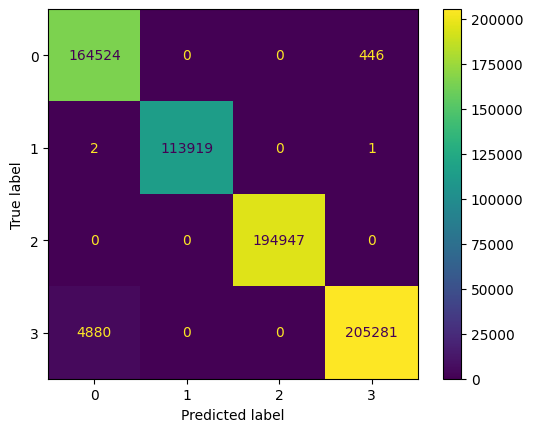

Saved to: xgboost.joblib
time cost:  102.46431303024292 seconds


In [24]:
start = time.time()

algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), 
    model_filename='xgboost.joblib')

end = time.time()
print('time cost: ', end - start, 'seconds')

### 4. Tinh chỉnh mô hình

Ở phần này ta sẽ sử dụng mô hình cho hiệu suất tốt nhất là XGBoost để thực hiện tinh chỉnh

In [25]:
X, y = iot_data.drop(columns='label'), iot_data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 4.1. Khai báo không gian tìm kiếm

In [26]:
xgb_model = xgb.XGBClassifier()

param_dist = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200]
}

#### 4.2. Tìm kiếm tham số ngẫu nhiên

- ```estimator```: Mô hình XGBoost.
- ```param_distributions```: Không gian tìm kiếm siêu tham số.
- ```n_iter```: Số lần lặp tìm kiếm ngẫu nhiên (ở đây là 10).
- ```scoring```: Chỉ số đánh giá (ở đây là F1-score trung bình macro).
- ```cv```: Số fold cross-validation (ở đây là 5).
- ```n_jobs```: Số lượng CPU sử dụng (-1 là sử dụng tất cả).
- ```verbose```: Mức độ hiển thị thông tin trong quá trình tìm kiếm.

In [27]:

# Tạo đối tượng RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Số lần lặp tìm kiếm ngẫu nhiên
    scoring='f1_macro',  # Chỉ số đánh giá
    cv=5,  # Số fold cross-validation
    n_jobs=-1,  # Sử dụng tất cả các CPU
    verbose=2
)

In [28]:
# Thực hiện tìm kiếm ngẫu nhiên
random_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters found: ", random_search.best_params_)
print("Best F1-score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best F1-score:  0.9924048791546107


In [29]:
best_params = random_search.best_params_

#### 4.3. Áp dụng vào mô hình

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.9; total time= 1.9min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.9; total time= 1.8min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 9.2min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 8.2min
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 6.1min
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 6.1min
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total

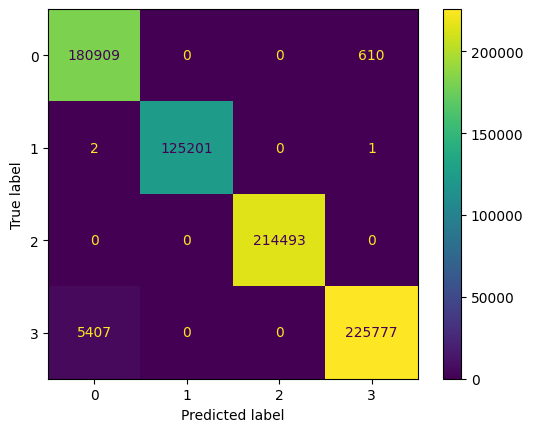

Saved to: model.joblib


In [30]:
algorithms(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                    classifier=xgb.XGBClassifier(**best_params),
                                    scaler=False)

Hiệu suất sau khi tinh chỉnh không có quá nhiều khác biết đáng lưu tâm nên ta sẽ giữ mô hình cũ